# Solving the n-Queens Problem using Local Search

**By: Braiden Hook**

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numba import njit

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

@njit()
def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

@njit()
def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
 
    cnt = [0] * (5 * n)
 
    for i in range(n):
        cnt[board[i]] += 1
        cnt[(n) + (i + board[i])] += 1
        cnt[(3 * n) + (i - board[i] + n)] += 1
 
    conflicts = 0
    for x in cnt:
        conflicts += comb2(x)
 
    return conflicts


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


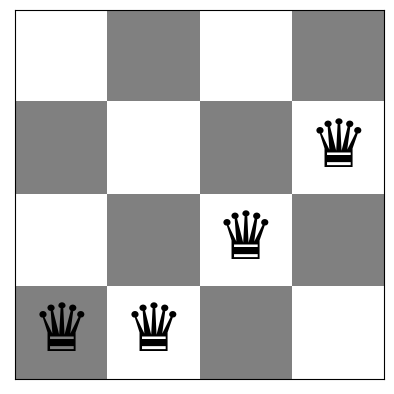

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [3]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


/Users/braidenhook/opt/anaconda3/envs/py37/lib/python3.7/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'board' of function 'conflicts'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../var/folders/gw/4v_zzf8s0n740jmt68l761hr0000gn/T/ipykernel_45009/4043369531.py", line 17:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


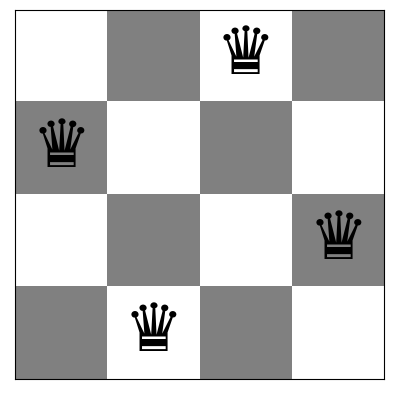

In [4]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [5]:
# Code and description go here
import random
import copy

def steepest_ascend(curr_board):
    # show_board(curr_board)
    # print(curr_board)
    neighbor = copy.deepcopy(curr_board)
    n = len(neighbor)
    all_conflicts = np.zeros((n,n))
    
    # Finding objective cost of all possible successors
    for col in range(n):
        curr = copy.deepcopy(neighbor)
        # print(curr)
        for row in range(n):
            curr[col] = row
            all_conflicts[row][col] = conflicts(curr)
    
    min_conflict = np.min(all_conflicts) # identifying lowest amount of conflicts
    # print(all_conflicts)
    # print(min_conflict)
    # locating where the minimum is in the array
    result = np.where(all_conflicts==min_conflict)
    # print(result)
    # picking randomly among all possible moves that have the minimum amount
    possible_moves = list(zip(result[0], result[1]))
    move = random.choice(possible_moves)
    # print(move)
    # print(possible_moves)
    # print(move[1], move[0])
    # adjusting the board based on the chosen move
    neighbor[move[1]] = move[0]
    move_str = f"Queen in column {move[1]} to row {move[0]}" # Sending back this string to identify the move
    return neighbor, move_str
    
            

def hill_climbing(board, search):
    current = copy.deepcopy(board)
    moves = []
    while True:
        # show_board(current)
        neighbor, move_str = search(current)
        # print(conflicts(neighbor))
        # print(conflicts(current))
        # If we cannot go any lower then this is our local minimum
        if conflicts(neighbor) >= conflicts(current):
            return current, moves
        # Enters when the neighbor has 0 conflicts. Just so we don't need to run it again
        elif conflicts(neighbor) == 0:
            moves.append(move_str)
            return neighbor, moves
        # When we can make a move which will lower conflicts
        else:
            current = neighbor
            moves.append(move_str)

Board with 9 conflicts.


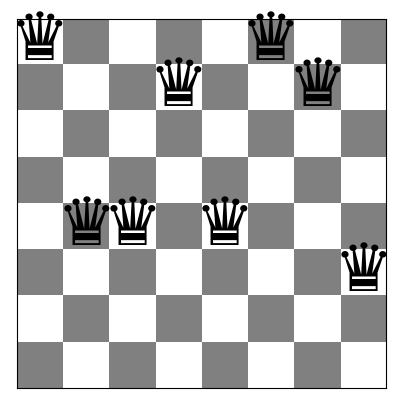

Moves:
Queen in column 1 to row 2
Queen in column 3 to row 6
Queen in column 0 to row 7
Queen in column 6 to row 5
Queen in column 7 to row 3

Board with 1 conflicts.


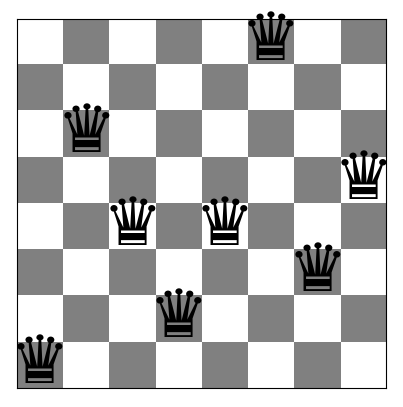

In [6]:
def output(type):
    board = [0,4,4,1,4,0,1,5] # random_board(8)

    show_board(board)
    # print(f"Queens (left to right) are at rows: {board}")
    # print(f"Number of conflicts: {conflicts(board)}")

    print("Moves:")
    local_min_board, moves = hill_climbing(board, type)
    for i in moves:
        print(i)
    print()
    show_board(local_min_board)

    # print(f"Queens (left to right) are at rows: {local_min_board}")
    # print(f"Number of conflicts: {conflicts(local_min_board)}")

output(steepest_ascend)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 9 conflicts.


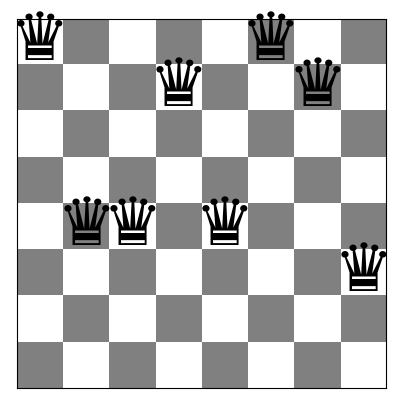

Moves:
Queen in column 5 to row 7
Queen in column 3 to row 6
Queen in column 1 to row 3
Queen in column 5 to row 2
Queen in column 2 to row 3

Board with 3 conflicts.


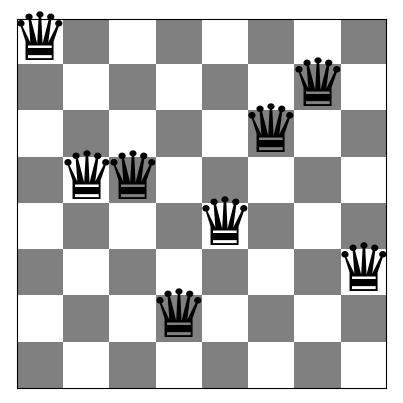

In [7]:
# Code and description go here

def stoch1 (curr_board):
    neighbor = copy.deepcopy(curr_board)
    n = len(neighbor)
    all_conflicts = np.zeros((n,n))

    h = conflicts(neighbor)

    possible_moves = {}
    
    # Finding objective cost of all possible successors
    for col in range(n):
        curr = copy.deepcopy(neighbor)
        # print(curr)
        for row in range(n):
            curr[col] = row
            cost = conflicts(curr)
            cord = (row, col)
            # Adding move to possible moves if the amount of conflicts is lower than the current amount of conflicts
            if cost < h:
                possible_moves[cord] = cost

    if len(possible_moves) == 0:
        return neighbor, "No possible moves"
    else:
        # print(possible_moves)
        # Picking randomly amount all uphill moves
        cord, cost = random.choice(list(possible_moves.items()))
        neighbor[cord[1]] = cord[0]
        move_str = f"Queen in column {cord[1]} to row {cord[0]}"
        return neighbor, move_str

output(stoch1)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 9 conflicts.


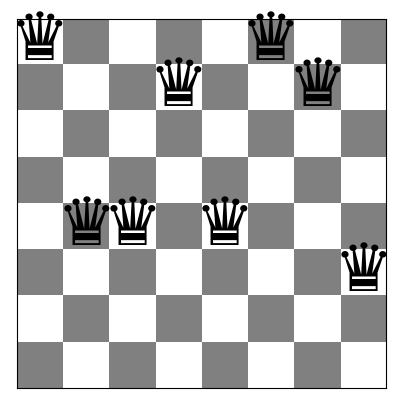

Moves:
Queen in column 7 to row 3
Queen in column 6 to row 3
Queen in column 5 to row 6
Queen in column 0 to row 7
Queen in column 1 to row 2
Queen in column 5 to row 0
Queen in column 7 to row 6

Board with 1 conflicts.


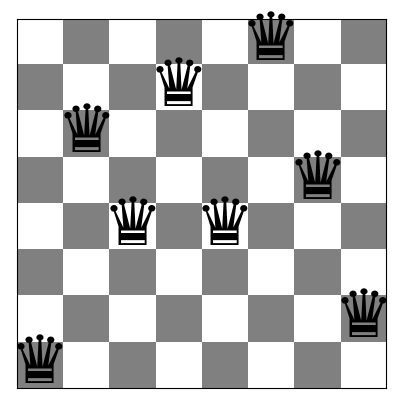

In [8]:
# Code and description go here

def stoch2(curr_board):
    n = len(curr_board)
    h = conflicts(curr_board)

    # Stoch2 has up to 100 tries to randomly find a better move
    # Randomly chooses a row and a column. Moves the queen located in the randomly chosen column
    # If the move lessens the amount of conflicts it will execute it immediately
    for x in range(100):
        neighbor = copy.deepcopy(curr_board)
        row = random.randint(0,n-1)
        col = random.randint(0,n-1)
        neighbor[col] = row
        if conflicts(neighbor) < h:
            move_str = f"Queen in column {col} to row {row}"
            return neighbor, move_str
    
    return curr_board, "Failed to find a better move"

output(stoch2)
    

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

Original Board:
Board with 8 conflicts.


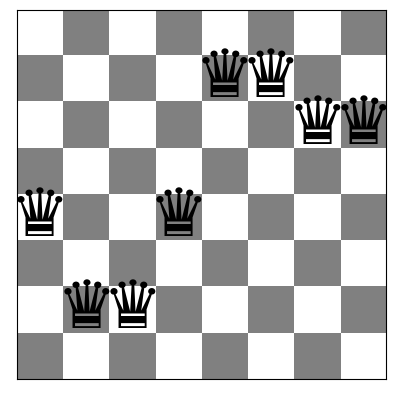

Local Minimum Restart Result:
Board with 0 conflicts.


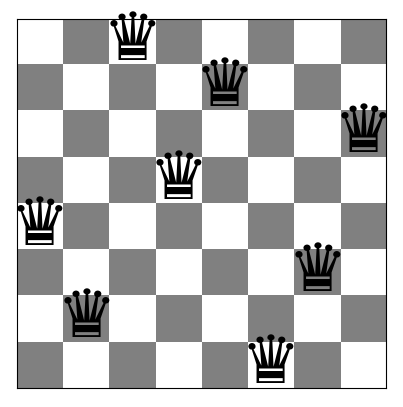

Attempts: 7
Result Moves:
Queen in column 2 to row 0
Queen in column 5 to row 5
Queen in column 3 to row 3
Queen in column 5 to row 7
Queen in column 6 to row 5


In [228]:
# Code and description go here
from threading import local


def restart_output(type, n=8):

    min = 10000
    og_board = []
    result = []
    result_moves = []

    for x in range(100):

        board = random_board(n)
        local_min_board, moves = hill_climbing(board, type)
        attempt = conflicts(local_min_board)

        if min > attempt:
            min = attempt
            og_board = board
            result = local_min_board
            result_moves = moves
            
        if min == 0:
            break

    print("Original Board:")
    show_board (og_board)
    print("Local Minimum Restart Result:")
    show_board (result)
    print("Attempts:", x+1)
    print("Result Moves:")
    for i in moves:
        print(i)
    

restart_output(steepest_ascend)


Original Board:
Board with 6 conflicts.


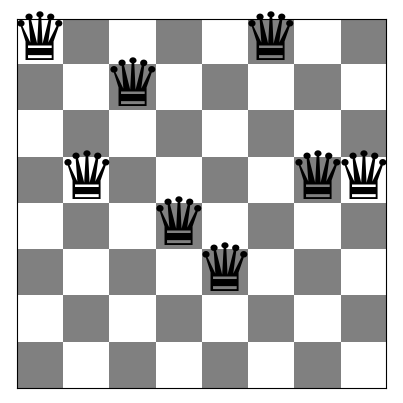

Local Minimum Restart Result:
Board with 0 conflicts.


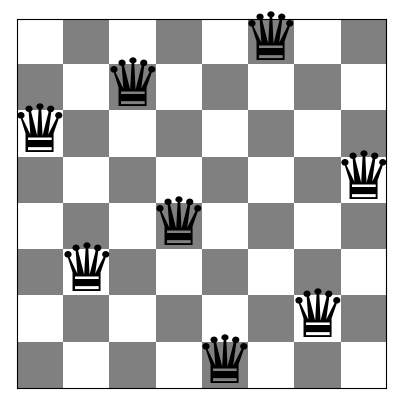

Attempts: 13
Result Moves:
Queen in column 1 to row 7
Queen in column 4 to row 7
Queen in column 1 to row 5
Queen in column 0 to row 2
Queen in column 6 to row 6


In [229]:
restart_output(stoch1)

Original Board:
Board with 8 conflicts.


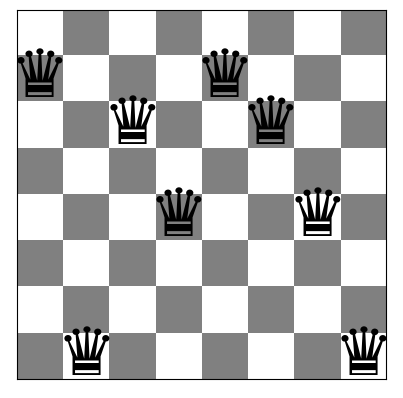

Local Minimum Restart Result:
Board with 0 conflicts.


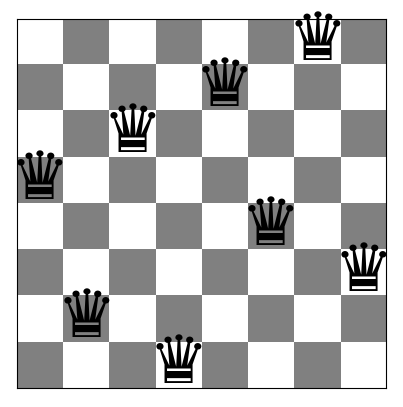

Attempts: 23
Result Moves:
Queen in column 7 to row 5
Queen in column 6 to row 5
Queen in column 5 to row 4
Queen in column 3 to row 7
Queen in column 6 to row 0
Queen in column 1 to row 6
Queen in column 0 to row 3


In [258]:
restart_output(stoch2)

The Stochastic Hill Climbing 2 search seems to be the best for the restart. It seemed to run a lot faster in comparision to the other two and had the same result on small boards.

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [265]:
# Code, results, charts and discussion go her
import time
import pandas as pd

sizes = [4, 8, 10, 25, 50, 100, 150]

def performance (type, sizes, restart=False):

    data = {'Size':[], 'Time (ms)': [], 'Conflicts Before': [], 'Conflicts After': []}

    for x in sizes:
        avg_time = 0
        avg_conflicts_og = 0
        avg_conflicts_result = 0
        for y in range(10):
            if restart:
                min = 1000
                og_board = []
                result = []
                t0 = time.time()
                for z in range(100):
                    board = random_board(x)
                    local_min_board, moves = hill_climbing(board, type)
                    attempt = conflicts(local_min_board)
                    if min > attempt:
                        min = attempt
                        og_board = board
                        result = local_min_board
                    if min == 0:
                        break

                t1 = time.time()
                avg_conflicts_og += conflicts(og_board)
            else:
                board = random_board(x)
                avg_conflicts_og += conflicts(board)
                t0 = time.time()
                result, moves = hill_climbing(board, type)
                t1 = time.time()
                
            avg_time += t1-t0
            avg_conflicts_result += conflicts(result)
        
        avg_time /= 10
        avg_conflicts_og /= 10
        avg_conflicts_result /= 10

        data['Size'].append(x)
        data['Time (ms)'].append(avg_time*1000)
        data['Conflicts Before'].append(avg_conflicts_og)
        data['Conflicts After'].append(avg_conflicts_result)
        # print(x, "Complete")

    
    df = pd.DataFrame.from_dict(data)

    return df


In [266]:
result_ascend = performance(steepest_ascend, sizes)
result_ascend

,Size,Time (ms),Conflicts Before,Conflicts After
0,4,0.275755,3.7,0.7
1,8,0.417519,8.7,1.4
2,10,0.622392,8.8,1.9
3,25,9.129000,29.5,2.4
4,50,79.371977,55.1,3.6
5,100,967.987919,120.4,3.3
6,150,3984.562778,174.5,4.9


In [267]:
result_stoch1 = performance(stoch1, sizes)
result_stoch1

,Size,Time (ms),Conflicts Before,Conflicts After
0,4,0.244927,3.5,1.0
1,8,0.605249,8.2,1.1
2,10,0.896454,11.3,1.6
3,25,13.090110,24.7,2.7
4,50,140.898132,58.7,3.9
5,100,1686.529040,115.7,5.1
6,150,6910.192871,168.7,6.0


In [268]:
result_stoch2 = performance(stoch2, sizes)
result_stoch2

,Size,Time (ms),Conflicts Before,Conflicts After
0,4,0.545835,2.5,0.9
1,8,0.760579,8.1,1.5
2,10,0.707603,10.2,1.9
3,25,1.371241,29.0,6.0
4,50,2.002192,56.7,12.8
5,100,3.673267,111.9,29.2
6,150,6.130242,177.5,45.2


In [269]:
result_restart = performance(stoch2, sizes, True)
result_restart

,Size,Time (ms),Conflicts Before,Conflicts After
0,4,1.156116,2.5,0.0
1,8,5.034709,7.5,0.0
2,10,26.511598,8.9,0.1
3,25,124.861670,28.8,2.1
4,50,212.500644,61.8,6.3
5,100,398.726583,111.9,17.5
6,150,636.105514,171.4,29.1


In [293]:
def merge_df (columns):
    df = result_ascend[columns]
    df = df.merge(result_stoch1[columns], on='Size', suffixes=("_ascend", "_stoch1"))
    df = df.merge(result_stoch2[columns], on='Size')
    df = df.merge(result_restart[columns], on='Size', suffixes=("_stoch2", "_restart"))
    df = df.set_index('Size')
    return df

time_df = merge_df(['Size', 'Time (ms)'])
display(time_df)
conflict_after_df = merge_df(['Size', 'Conflicts After'])
display(conflict_after_df)
conflict_overall_df = merge_df(['Size', 'Conflicts Before', 'Conflicts After'])
display(conflict_overall_df)

,Time (ms)_ascend,Time (ms)_stoch1,Time (ms)_stoch2,Time (ms)_restart
Size,,,,
4,0.275755,0.244927,0.545835,1.156116
8,0.417519,0.605249,0.760579,5.034709
10,0.622392,0.896454,0.707603,26.511598
25,9.129000,13.090110,1.371241,124.861670
50,79.371977,140.898132,2.002192,212.500644
100,967.987919,1686.529040,3.673267,398.726583
150,3984.562778,6910.192871,6.130242,636.105514


,Conflicts After_ascend,Conflicts After_stoch1,Conflicts After_stoch2,Conflicts After_restart
Size,,,,
4,0.7,1.0,0.9,0.0
8,1.4,1.1,1.5,0.0
10,1.9,1.6,1.9,0.1
25,2.4,2.7,6.0,2.1
50,3.6,3.9,12.8,6.3
100,3.3,5.1,29.2,17.5
150,4.9,6.0,45.2,29.1


,Conflicts Before_ascend,Conflicts After_ascend,Conflicts Before_stoch1,Conflicts After_stoch1,Conflicts Before_stoch2,Conflicts After_stoch2,Conflicts Before_restart,Conflicts After_restart
Size,,,,,,,,
4,3.7,0.7,3.5,1.0,2.5,0.9,2.5,0.0
8,8.7,1.4,8.2,1.1,8.1,1.5,7.5,0.0
10,8.8,1.9,11.3,1.6,10.2,1.9,8.9,0.1
25,29.5,2.4,24.7,2.7,29.0,6.0,28.8,2.1
50,55.1,3.6,58.7,3.9,56.7,12.8,61.8,6.3
100,120.4,3.3,115.7,5.1,111.9,29.2,111.9,17.5
150,174.5,4.9,168.7,6.0,177.5,45.2,171.4,29.1


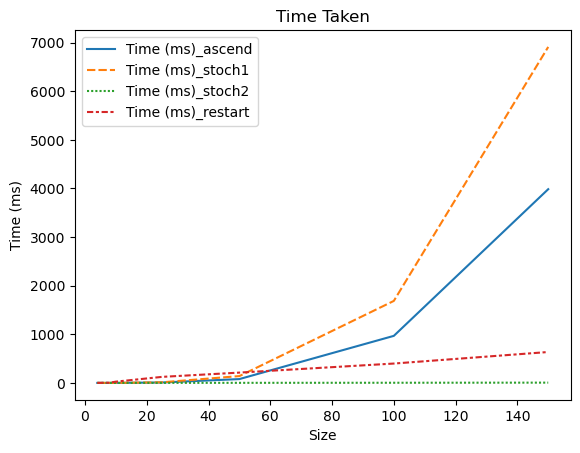

In [294]:
import seaborn as sns
sns.lineplot(data=time_df)
plt.title("Time Taken")
plt.ylabel("Time (ms)")
plt.show()

As you can see here the most time efficient search is Stochastic Hill Climbing 2. Steepest Ascent and Stochastic Hill Climbing 1 increase expontentially as the size of the board increases. The reason this is the case is because Stochastic Hill Climbing 2 is runs in constant time whereas the other two run in O(n^2) time. The only comparable search in terms of time efficiency is the restart search which I also used Stochastic Hill Climbing 2 on.

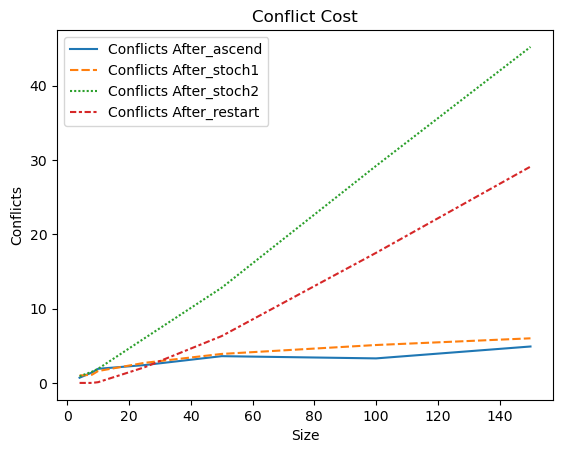

In [295]:
sns.lineplot(data=conflict_after_df)
plt.title("Conflict Cost")
plt.ylabel("Conflicts")
plt.show()

Unfortunately, as the size increases, while the time efficiency is great, it fails in objective efficiency. Stochastic Hill Climbing 2 leaves the most conflicts left in all sizes. Luckily when we run the restart search on Stochastic Hill Climbing 2 we are able minimize the amount of conflicts much more, especially early on. When the size increases the restart improvement fails to compare to Stochastic Hill Climbing 1 and Steepest Ascent, however this is done with only 100 restarts, it may possibly perform better with more restarts.

In stark contrast to the time efficiency, Stochastic Hill Climbing 1 and Steepest Ascent are the best searches to minimize the most conflicts.

In [432]:
conflict_at_150 = {'Search':[], 'Type':[], 'Value':[]}
even = True
count = 0
for x in conflict_overall_df.iloc[6]:
    column_name = conflict_overall_df.columns[count]
    conflict_at_150['Search'].append(column_name[column_name.find('_')+1:])
    conflict_at_150['Value'].append(x)
    if even:
        conflict_at_150['Type'].append("Before")
        even = False
    else:
        conflict_at_150['Type'].append("After")
        even = True
    count+=1

conflict_at_150_df = pd.DataFrame.from_dict(data=conflict_at_150)#, orient='index', columns=['Ascend', 'Stoch1', 'Stoch2', 'Restart'])
conflict_at_150_df

,Search,Type,Value
0,ascend,Before,174.5
1,ascend,After,4.9
2,stoch1,Before,168.7
3,stoch1,After,6.0
4,stoch2,Before,177.5
5,stoch2,After,45.2
6,restart,Before,171.4
7,restart,After,29.1


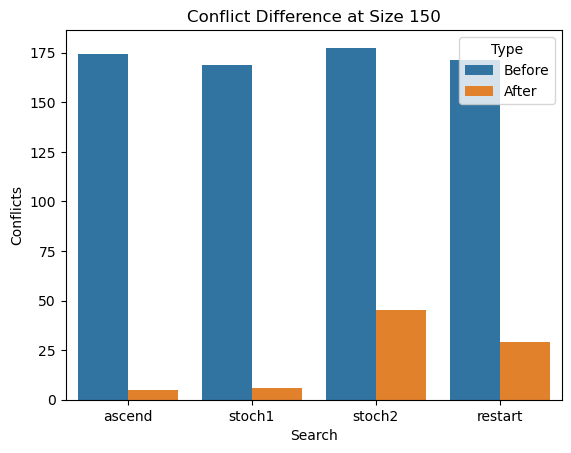

In [431]:
sns.barplot(conflict_at_150_df, x='Search', y='Value', hue='Type')
plt.title("Conflict Difference at Size 150")
plt.xlabel("Search")
plt.ylabel("Conflicts")
plt.show()

Then lastly here we have an overview on the conflict minimization. As you can see, all of the search algos do a good job in being able to decrease the amount of conflicts. While Greatest Ascent and Stochastic Hill Climbing 1 decrease them the most, I do not think that it is worth the trade off of the runtime we got from the Restart search of Stochastic Hill Climbing 2.

This is especially the case on larger size boards that go beyond 300 in size (it was impossible to go beyond 150 especially when running it 10 times for comparison). I found it very unreasonable to run Steepest Ascent and Stochastic Hill Climbing 1 on anything beyond this size. It takes far to long to calculate the cost of every single square on the board. However, with Stochastic Hill Climbing 2 you can go beyond a 1000 size board with ease and even a 10000 board within a few seconds. Yes, you will not be able to minimize as many conflicts compared to the Steepest Ascent and Stochastic Hill Climbing 1, but it will still be able to handle those bigger boards. If you also increase the amount of restarts when running the restart search with Stochastic Hill Climbing 2, then you even have a higher chance at increasing the minimization of conflicts.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

Board with 11 conflicts.


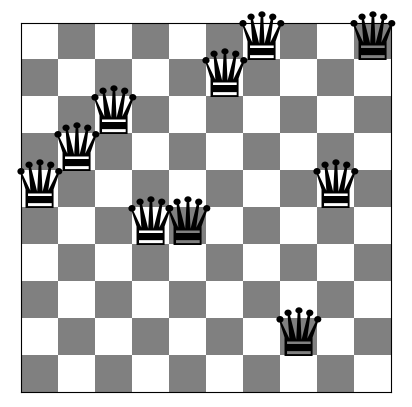

Board with 8 conflicts.


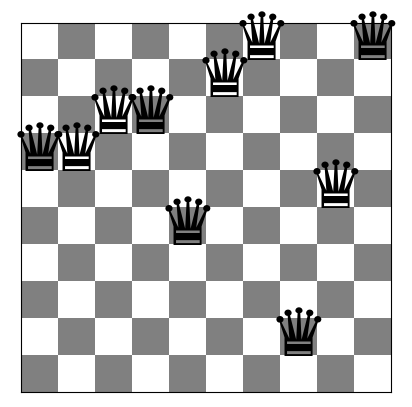

In [13]:
# Code and description go here
from numpy import exp
import math
import itertools

def simulated_annealing(board, schedule, n, a=0.9999):

    current = copy.deepcopy(board)

    for t in itertools.count(start=1):
        temp = schedule[0]*(a**t)
        # print(conflicts(current))
        if temp < 0.0000001:
            return current
        
        next = copy.deepcopy(current)
        row = random.randint(0,n-1)
        col = random.randint(0,n-1)
        next[col] = row
        e = conflicts(current) - conflicts(next)
        if e > 0:
            current = next
        else:
            next_prob = exp(e / temp)
            # print(e, temp, next_prob, conflicts(current))
            # next_prob = math.e**(-e / temp)
            curr_prob = 1-next_prob
            # print(next_prob, curr_prob)
            current = random.choices(population=[current, next], weights=[curr_prob, next_prob])[0]
        

i = 0
results = []
og_board = random_board(10)
# while i < 2500:
#     schedule = [i]

#     new_board = simulated_annealing(og_board, schedule, len(board))

#     results.append(conflicts(new_board))

#     i += 1

schedule = [100]

show_board(og_board)

new_board = simulated_annealing(og_board, schedule, len(board))
show_board(new_board)     


Board with 111 conflicts.


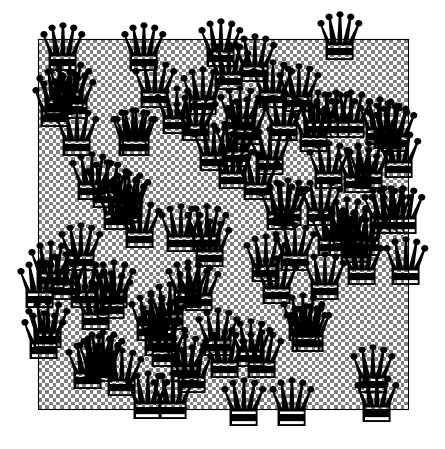

Board with 104 conflicts.


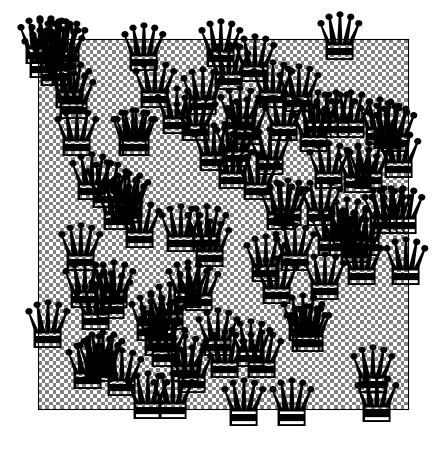

In [582]:
# schedule = [results.index(min(results))]
schedule = [10]
new_board = simulated_annealing(og_board, schedule, len(board))
show_board(og_board)
show_board(new_board)

After running through multiple tests on the simulated annealing function, I was unable to find a proper temperature to start at that would allow my algorithm to perform similar to the other local searches. I decided to go with the exponential cooling equation to use for my annealing schedule (Tt = T0*a^t), however it did not work to the way I believe it should have unfortunately. I did update the temperature with every iteration so it did follow the equation, however I did not receive the desired result. As such, the other local searches are better.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [10]:
# Code and description go here